In [1]:
from standardInclude import *

ERROR! Session/line number was not unique in database. History logging moved to new session 150
Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
f = r.TFile("./data/stripped_gm2skim_ana_16356.root")


t = f.Get("allmuons/tree")
t.Print()

TFile**		./data/stripped_gm2skim_ana_16356.root	
 TFile*		./data/stripped_gm2skim_ana_16356.root	
  KEY: TDirectoryFile	allmuons;1	allmuons
******************************************************************************
*Tree    :tree      : allmuons                                               *
*Entries :    39766 : Total =       758296151 bytes  File  Size =  378156830 *
*        :          : Tree compression factor =   2.00                       *
******************************************************************************
*Br    0 :midasSerialNum : midasSerialNum/i                                  *
*Entries :    39766 : Total  Size=     202027 bytes  File Size  =     114505 *
*Baskets :      422 : Basket Size=      32000 bytes  Compression=   1.69     *
*............................................................................*
*Br    1 :runNum    : runNum/i                                               *
*Entries :    39766 : Total  Size=     198619 bytes  File Size  =     

Error in <TFile::cd>: Unknown directory trackerNTup


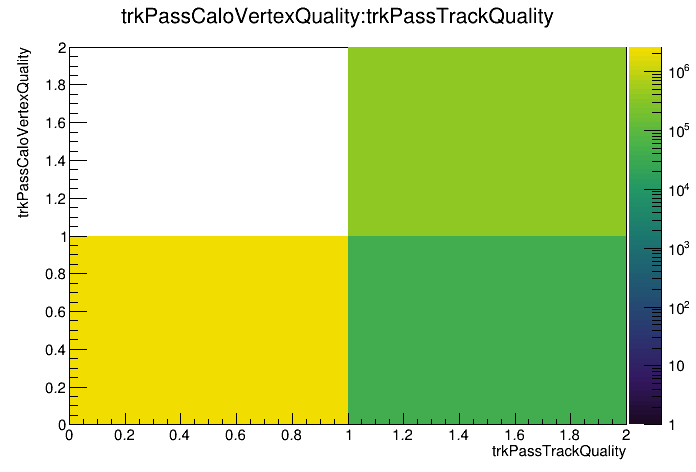

In [3]:
c = r.TCanvas()

t.Draw("trkPassCaloVertexQuality:trkPassTrackQuality","","colz")
c.SetLogz()
c.Draw()

In [5]:
caloEnergyCut = "cluEne > 1100 && cluEne < 2400 "
qualityCut = "trkPassCaloVertexQuality && trkPassTrackQuality && trkPassVertexQuality"

allCuts = caloEnergyCut+" && "+qualityCut

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


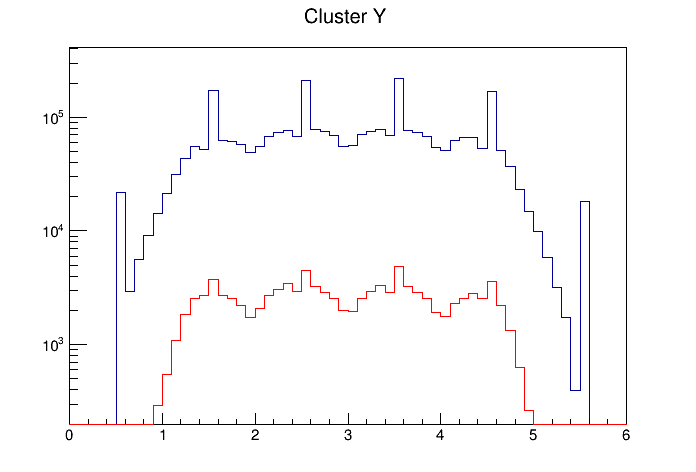

In [6]:
c = r.TCanvas()
h = r.TH1D("h","Cluster Y",60,0,6)
h2 = h.Clone("h2")
h2.SetLineColor(2)
t.Draw("cluY>>h","","goff")
t.Draw("cluY>>h2",caloEnergyCut+" && "+qualityCut,"goff")

h.Draw()
h2.Draw("SAME")
c.SetLogy()

c.Draw()

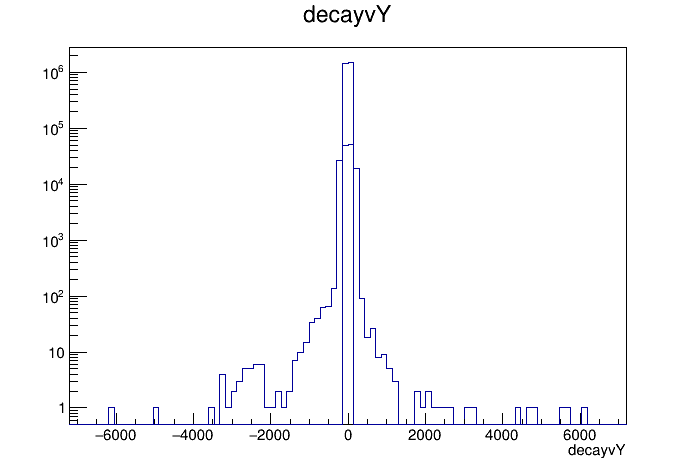

In [8]:
c = r.TCanvas()


t.Draw("decayvY","","")
t.Draw("decayvY",caloEnergyCut+" && "+qualityCut,"same")


c.SetLogy()

c.Draw()


****************************************
Minimizer is Linear
Chi2                      =  7.31518e+06
NDf                       =         3435
p0                        =     0.144265   +/-   0.21785     
p1                        =    0.0371968   +/-   0.00866193  


Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


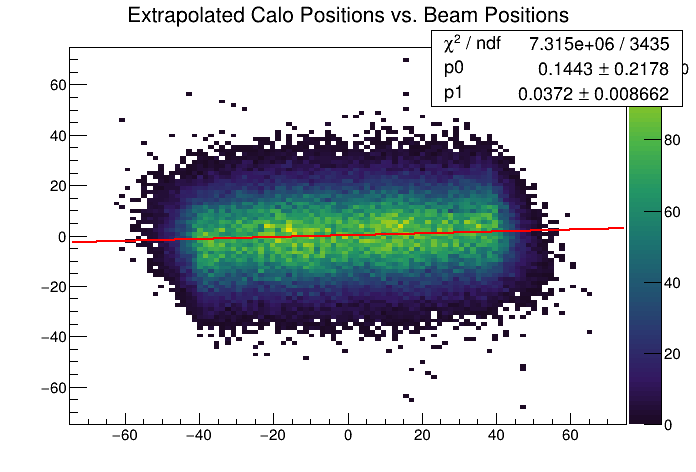

In [9]:
c = r.TCanvas()

h = r.TH2D("h","Extrapolated Calo Positions vs. Beam Positions", 100,-75,75, 100,-75,75)

t.Draw("decayvY:vY>>h",caloEnergyCut+" && "+qualityCut,"goff")

h.Draw("colz")
h.Fit("pol1")


#c.SetLogy()

c.Draw()


****************************************
Minimizer is Linear
Chi2                      =      46431.9
NDf                       =          579
p0                        =     0.890153   +/-   0.608723    
p1                        =  -0.00620757   +/-   0.0139125   


Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


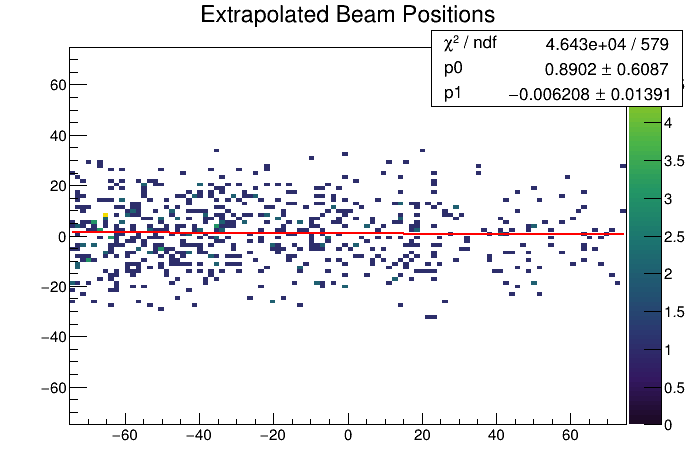

In [29]:
c = r.TCanvas()

h = r.TH2D("h","Extrapolated Beam Positions", 100,-75,75, 100,-75,75)

t.Draw("decayvY:decayvX>>h",caloEnergyCut+" && "+qualityCut,"goff")

h.Draw("colz")
h.Fit("pol1")


#c.SetLogy()

c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


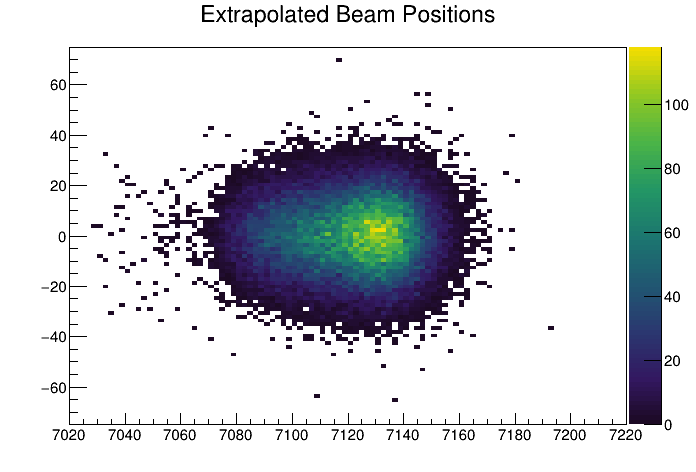

In [38]:
c = r.TCanvas()

h = r.TH2D("h","Extrapolated Beam Positions", 100,7020,7220,  100,-75,75)

t.Draw("decayvY:TMath::Sqrt( decayvZ**2 + decayvX**2)>>h",caloEnergyCut+" && "+qualityCut+" && trkStationNum == 18","colz")

h.Draw("colz")
#h.Fit("pol1")


#c.SetLogy()

c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


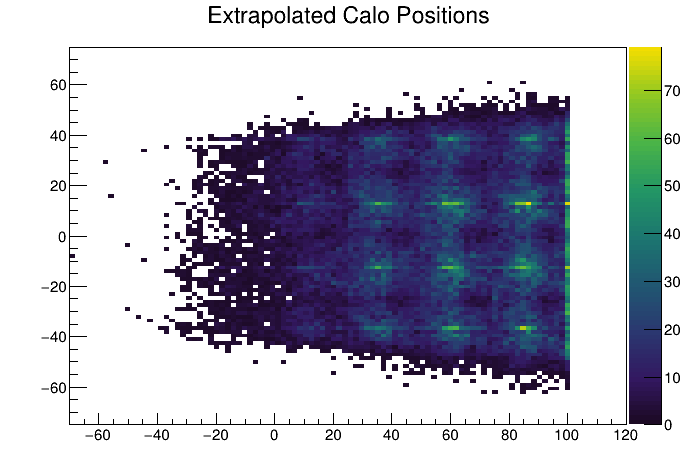

In [44]:
c = r.TCanvas()

h = r.TH2D("h","Extrapolated Calo Positions", 100,-70,120,100,-75,75)

t.Draw("(cluY-3)*25:(cluX-9.0/2)*25>>h",caloEnergyCut+" && "+qualityCut+" && trkStationNum == 18","colz")

h.Draw("colz")
#h.Fit("pol1")


#c.SetLogy()

c.Draw()


****************************************
Minimizer is Linear
Chi2                      =       351812
NDf                       =         1095
p0                        =    -0.931563   +/-   0.0846167   
p1                        =      1.03066   +/-   0.00336445  


Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


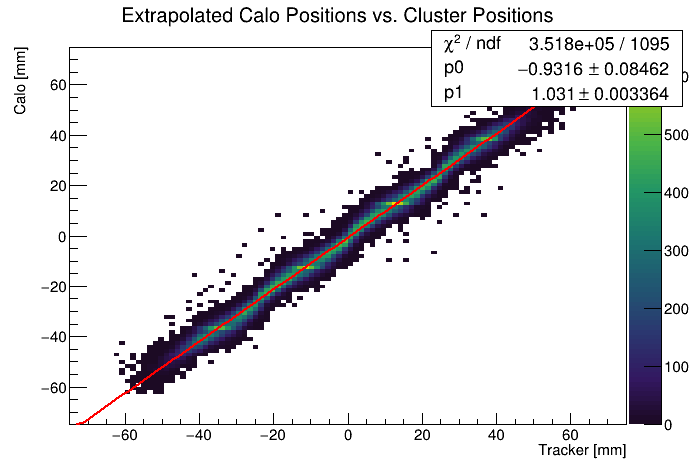

In [10]:
c = r.TCanvas()

h = r.TH2D("h","Extrapolated Calo Positions vs. Cluster Positions; Tracker [mm]; Calo [mm]", 100,-75,75, 100,-75,75)

t.Draw("(cluY-3)*25:vY>>h",caloEnergyCut+" && "+qualityCut,"goff")

h.Draw("colz")
h.Fit("pol1")


#c.SetLogy()

c.Draw()


****************************************
Minimizer is Linear
Chi2                      =   2.0199e+07
NDf                       =        57907
p0                        =     0.208239   +/-   0.200087    
p1                        =  -0.00225411   +/-   0.00170657  


Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


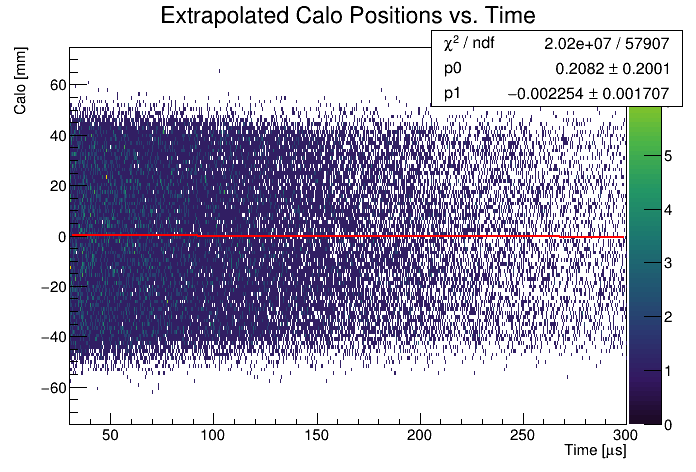

In [11]:
c = r.TCanvas()

h = r.TH2D("h","Extrapolated Calo Positions vs. Time; Time [#mus]; Calo [mm]", 4700,30,300, 100,-75,75)

t.Draw("vY:cluTime/1000.*1.25>>h",caloEnergyCut+" && "+qualityCut,"goff")

h.Draw("colz")
h.Fit("pol1")


means = []
times = []
errs = []
for binx in range(1, h.GetNbinsX()):
    h2 = h.ProjectionY("",binx,binx)
    means.append( h2.GetMean(1) )
    errs.append( h2.GetMean(11) )
    times.append( h.GetXaxis().GetBinCenter(binx ) )


#c.SetLogy()

c.Draw()

In [12]:
trackerVsCaloY_random = r.TH3I("trackerVsCaloY","Y-Distribution in Calo vs. Tracker vs. Time; calo cluster time [#mus]; tracker decay y [mm]; calo cluster y [mm from center]",                                              2500,25,397.975,                                                                                                                                                                                                                                                                                                                                                                        251,-75,75,                                                                                                                                                                                          251,-75,75) 
t.Draw("(cluY-3)*25:vY:(cluTime)/1000.*1.25>>trackerVsCaloY",allCuts,"goff")   



100966

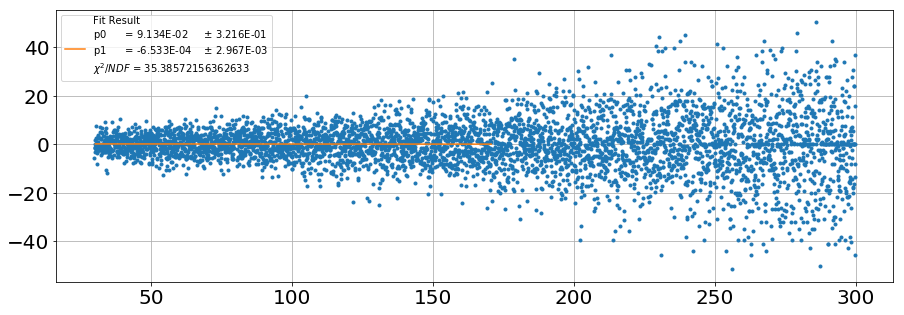

In [13]:

fig, ax = plt.subplots(figsize=(15,5))
plt.plot(times,means,".")

xvals = times
yvals = means
yerrvals = errs

func = r.TF1("func","pol1",10,1000,2)
func.SetParameters(1,1)
fitrange = [5, 2450]
fitresult = fitVector( xvals[fitrange[0]:fitrange[1]], yvals[fitrange[0]:fitrange[1]], func,
                        #xerr=dfi['calo_y_err'], 
                        #xerr=[0 for i in range(len(dfi['calo_y']))], 
                        yerr=yerrvals[fitrange[0]:fitrange[1]],
                        #yerr=dfi['tracker_y_err'] 
                     )
plt.plot(xvals[fitrange[0]:fitrange[1]], fitresult[0],
        label=labelFit(fitresult[1][0], fitresult[1][1], None, fitresult[2]) )
plt.legend()
plt.grid()

plt.show()

In [14]:
caloEnergyCut = "cluEne > 1100 && cluEne < 2400 "  
qualityCut = "trkPassCaloVertexQuality && trkPassTrackQuality && trkPassVertexQuality"   
stationCut = " trkStationNum == 12 "          
allCuts = caloEnergyCut+" && "+qualityCut+" && "+stationCut       

Warning in <TFile::Append>: Replacing existing TH1: h (Potential memory leak).


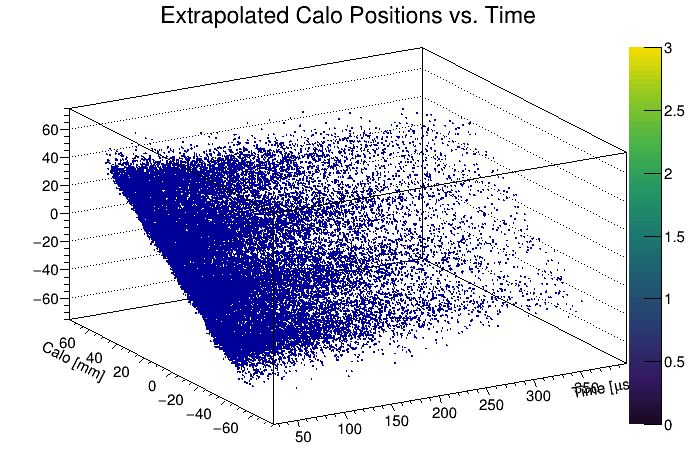

In [15]:
h = r.TH3I("h","Extrapolated Calo Positions vs. Time; Time [#mus]; Calo [mm]", 2500,25,397.975, 251,-75,75, 251,-75,75 )

t.Draw("(cluY-3)*25:vY:cluTime/1000.*1.25>>h",allCuts,"goff")

c = r.TCanvas()
h.Draw("lego2z")
c.Draw()
    
fout = r.TFile("./from_tree.root","RECREATE")
h.Write()
fout.Close()

In [16]:
means = []
times = []
errs = []
for binx in range(1, h.GetNbinsX()):
    h.GetXaxis().SetRange(binx,binx)
    h2 = h.Project3D("z")
    h3 = h.Project3D("y")
    means.append( h2.GetMean(1) )
    errs.append( h2.GetMean(11) )
    times.append( h.GetXaxis().GetBinCenter(binx ) )

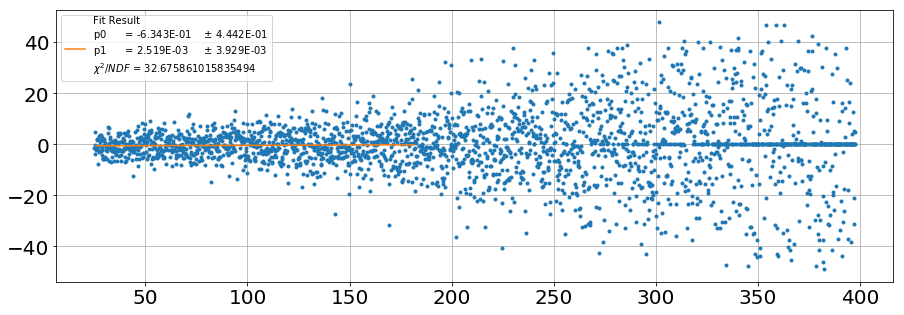

In [17]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(times,means,".")

xvals = times
yvals = means
yerrvals = errs

func = r.TF1("func","pol1",10,1000,2)
func.SetParameters(1,1)
fitrange = [5, 1050]
fitresult = fitVector( xvals[fitrange[0]:fitrange[1]], yvals[fitrange[0]:fitrange[1]], func,
                        #xerr=dfi['calo_y_err'], 
                        #xerr=[0 for i in range(len(dfi['calo_y']))], 
                        yerr=yerrvals[fitrange[0]:fitrange[1]],
                        #yerr=dfi['tracker_y_err'] 
                     )
plt.plot(xvals[fitrange[0]:fitrange[1]], fitresult[0],
        label=labelFit(fitresult[1][0], fitresult[1][1], None, fitresult[2]) )
plt.legend()
plt.grid()

plt.show()


****************************************
Minimizer is Linear
Chi2                      =  1.97691e+07
NDf                       =        55994
p0                        =    -0.852207   +/-   0.241893    
p1                        = -0.000446248   +/-   0.00249396  


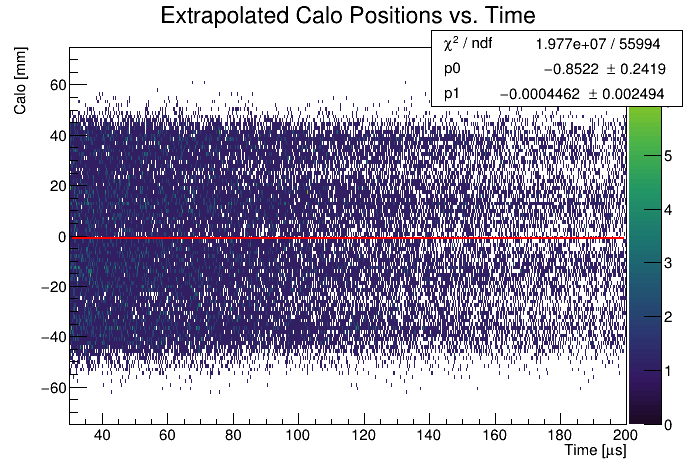

In [18]:
c = r.TCanvas()

h = r.TH2D("h","Extrapolated Calo Positions vs. Time; Time [#mus]; Calo [mm]", 4700,30,200, 100,-75,75)

t.Draw("(cluY-3)*25:cluTime/1000.*1.25>>h",caloEnergyCut+" && "+qualityCut,"goff")

h.Draw("colz")
h.Fit("pol1")


#c.SetLogy()

c.Draw()

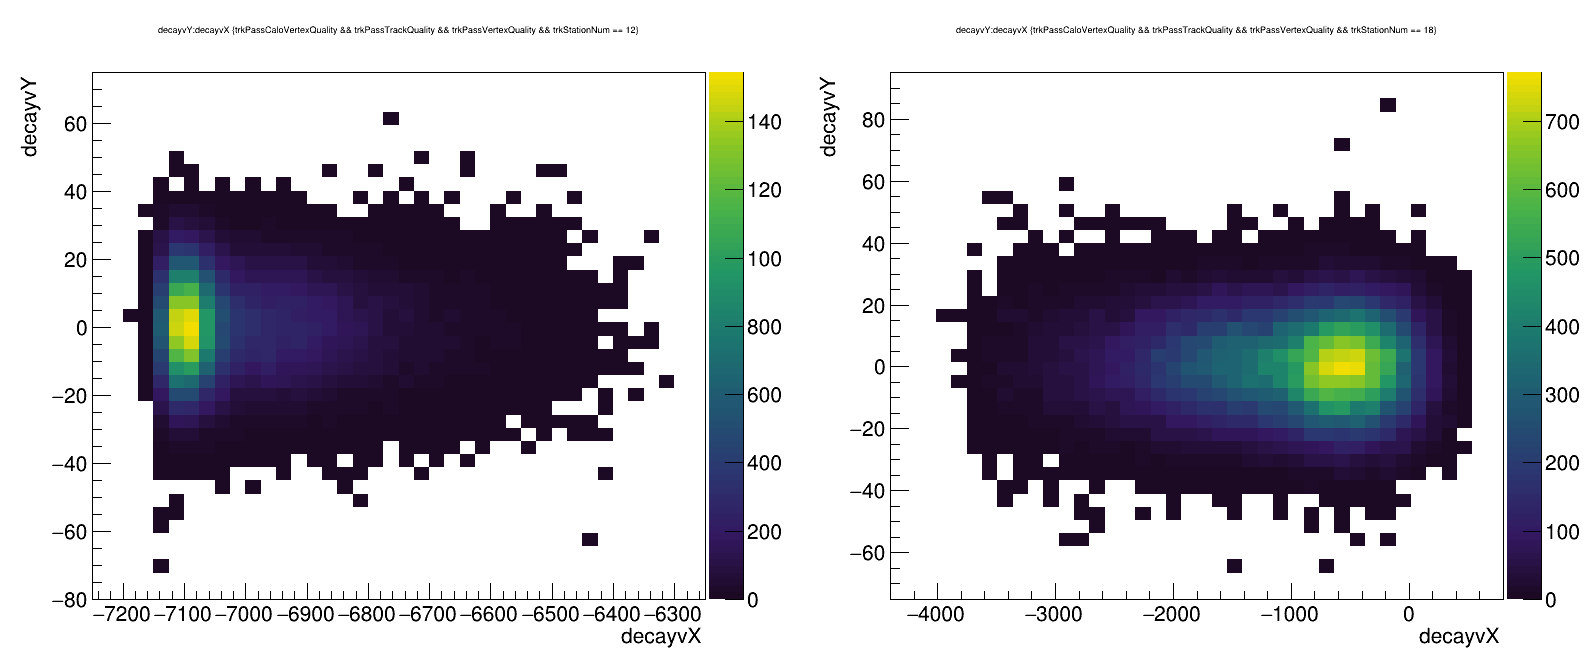

In [19]:
c = r.TCanvas("c","c",1600,700)
c.Divide(2)
c.cd(1)

t.Draw("decayvY:decayvX",qualityCut+" && trkStationNum == 12","colz")
c.cd(2)
t.Draw("decayvY:decayvX",qualityCut+" && trkStationNum == 18","colz")

c.Draw()

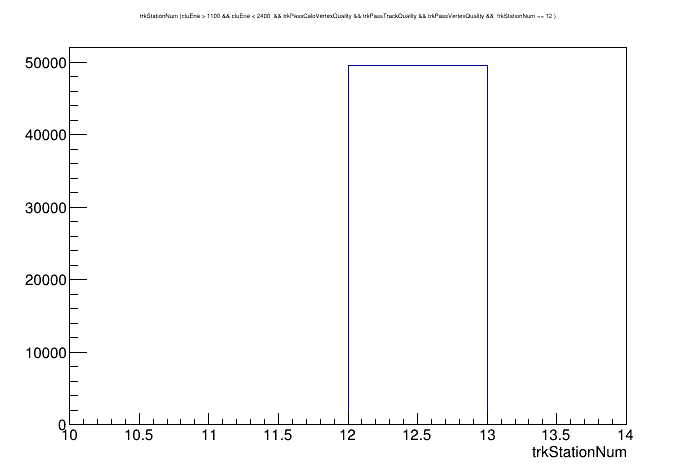

In [20]:
c = r.TCanvas()


t.Draw("trkStationNum",allCuts,"")


c.SetLogz()

c.Draw()

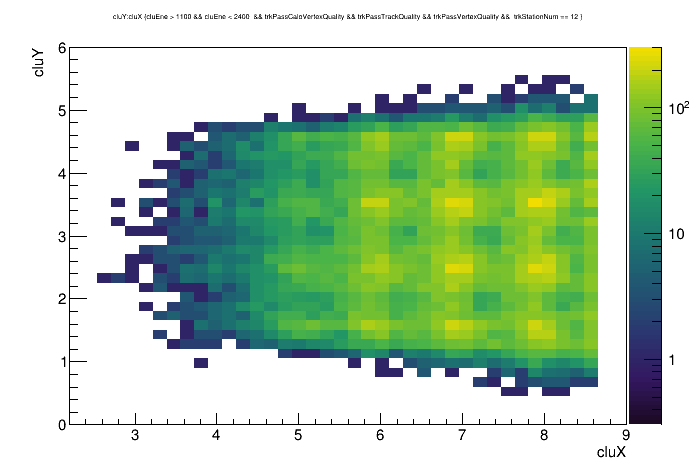

In [21]:
c = r.TCanvas()


t.Draw("cluY:cluX",allCuts,"colz")


c.SetLogz()

c.Draw()

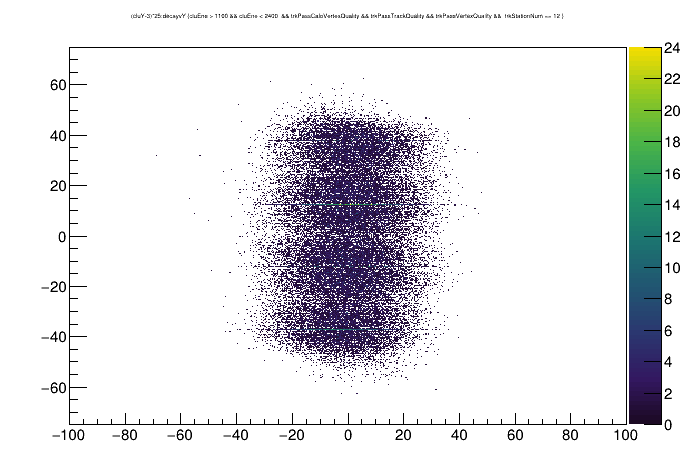

In [22]:
c = r.TCanvas()

t.Draw("(cluY-3)*25:decayvY>>hist(500,-100,100,500,-75,75)",
       allCuts,
       #"",
       "colz")
#c.SetLogz()
c.Draw()

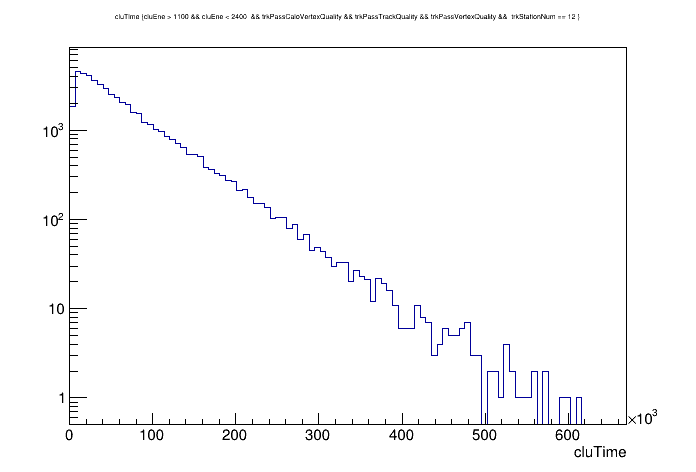

In [23]:
c = r.TCanvas()

t.Draw("cluTime",allCuts,"colz")
c.SetLogy()
c.Draw()

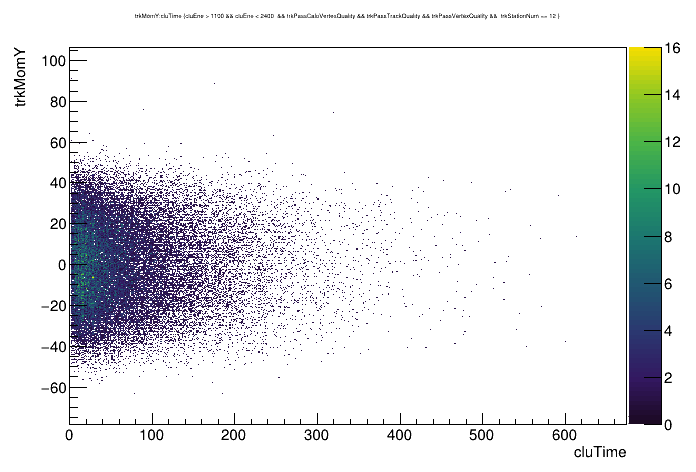

In [24]:
c  = r.TCanvas()
#t.Draw("vPY:cluTime",allCuts,"colz")
t.Draw("trkMomY:cluTime",allCuts,"colz")
c.Draw()

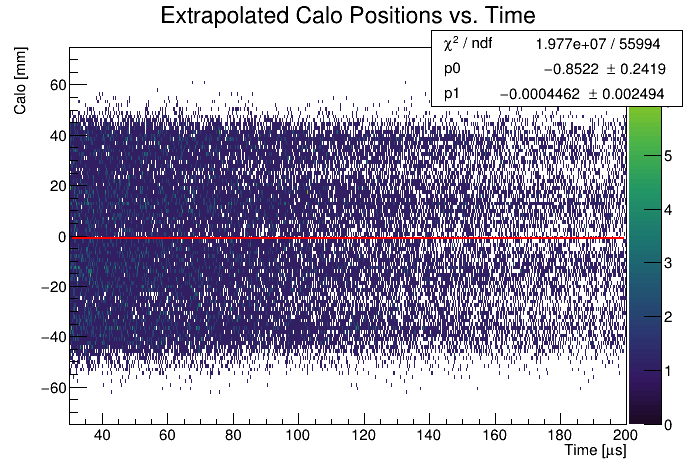

In [25]:
c  = r.TCanvas()
h.Draw("colz")
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


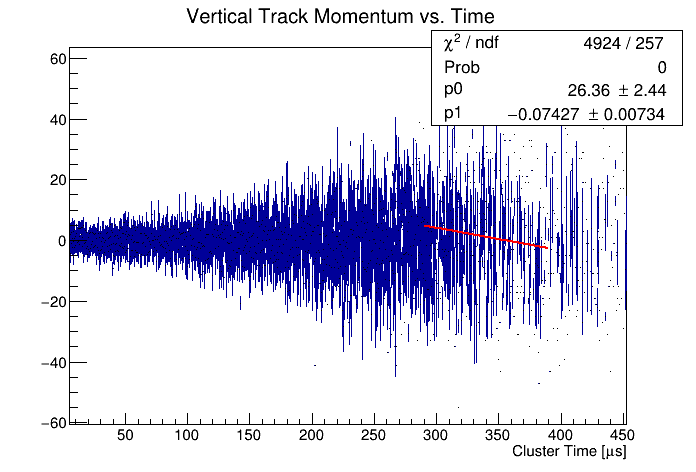

In [26]:
c  = r.TCanvas()
h = r.TH2I("h","Vertical Track Momentum vs. Time; Cluster Time [#mus]; Vertical Track Momentum (vPY) At Calo Face [???]",
           3000,5,452.57,
           100,-100,100)
t.Draw("vPY:cluTime/1000.*1.25>>h",allCuts,"colz")

slopes = []
times = []

h2 = h.ProfileX().Clone()
h.Draw()
for i in range(30,300,10):
    times.append(i)
    func = r.TF1("func","pol1",i,i+100)
    h2.Fit(func, "REMBQ")
    slopes.append(func.GetParameter(1))
c.Draw()

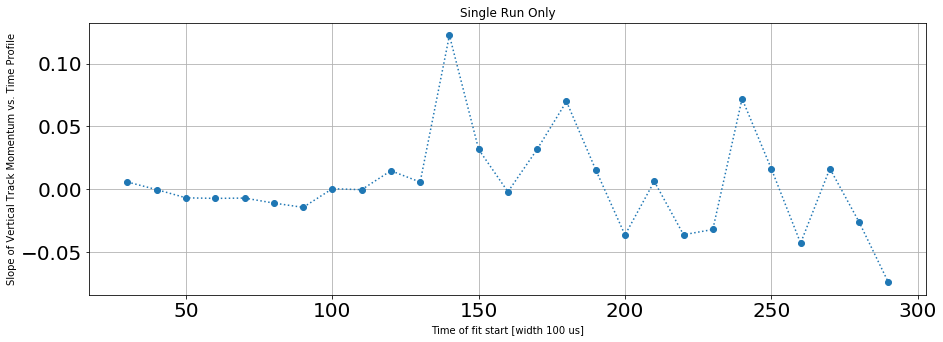

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(times,slopes,"o:")
plt.xlabel("Time of fit start [width 100 us]")
plt.ylabel("Slope of Vertical Track Momentum vs. Time Profile")
plt.title("Single Run Only")
plt.grid()
plt.show()

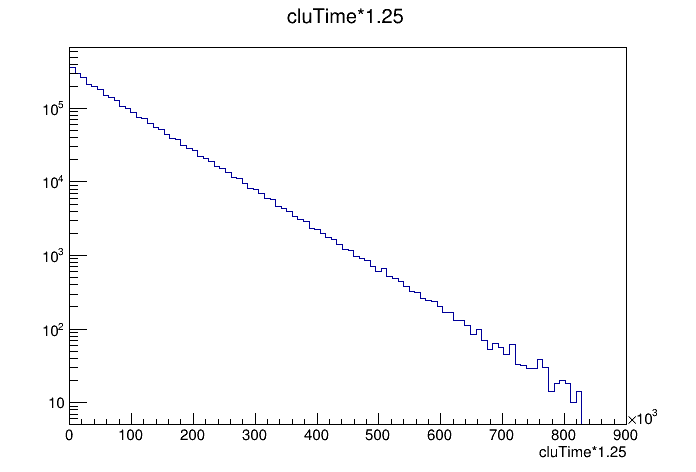

In [28]:
c = r.TCanvas()
t.Draw("cluTime*1.25")
c.SetLogy()
c.Draw()